In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
data = np.genfromtxt("../로그 데이터/streambench.per.G/streambench.2G.parsed1", delimiter="\n", dtype=np.int64)
data

array([ 4294967280,     1040475,     1011912, ..., 47206649168,
       47206563728, 47206644112], dtype=int64)

In [3]:
delta = np.array([data[i+1] - data[i] for i in range(int(len(data))-1)])
delta, len(delta)

(array([-4293926805,      -28563,       36408, ...,     1105095,
             -85440,       80384], dtype=int64),
 158074)

In [4]:
data_counts = pd.Series(data=delta.T).value_counts()
data_counts

 0              77564
 4096           71515
 12288           2933
 2097152         2032
-6291456         1164
                ...  
-60285623688        1
 3219979093         1
-55322432160        1
 119024             1
 952296             1
Length: 859, dtype: int64

In [5]:
def category_by_threshold(data_counts, threshold, sign="over"):
    if sign == "under":
        category = (data_counts < threshold)
    else:
        category = (data_counts > threshold)
    return category.index[category == True]

In [6]:
def tokenizer(data, category, oov=-1):
    data = data.copy()
    mask = np.isin(data, category)
    data[mask == False] = oov
    return data

In [7]:
threshold = 100
category_over_threshold = category_by_threshold(data_counts, threshold)
category_over_threshold

Int64Index([0, 4096, 12288, 2097152, -6291456, 98304, 24576, 36864, 196608], dtype='int64')

In [8]:
tokenized_data = tokenizer(delta, category_over_threshold.to_numpy(), oov=-1)
tokenized_data

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [9]:
tokenized_data_counts = pd.Series(data=tokenized_data.T).value_counts()
tokenized_data_counts

 0          77564
 4096       71515
 12288       2933
 2097152     2032
-1           1840
-6291456     1164
 98304        597
 24576        179
 36864        145
 196608       105
dtype: int64

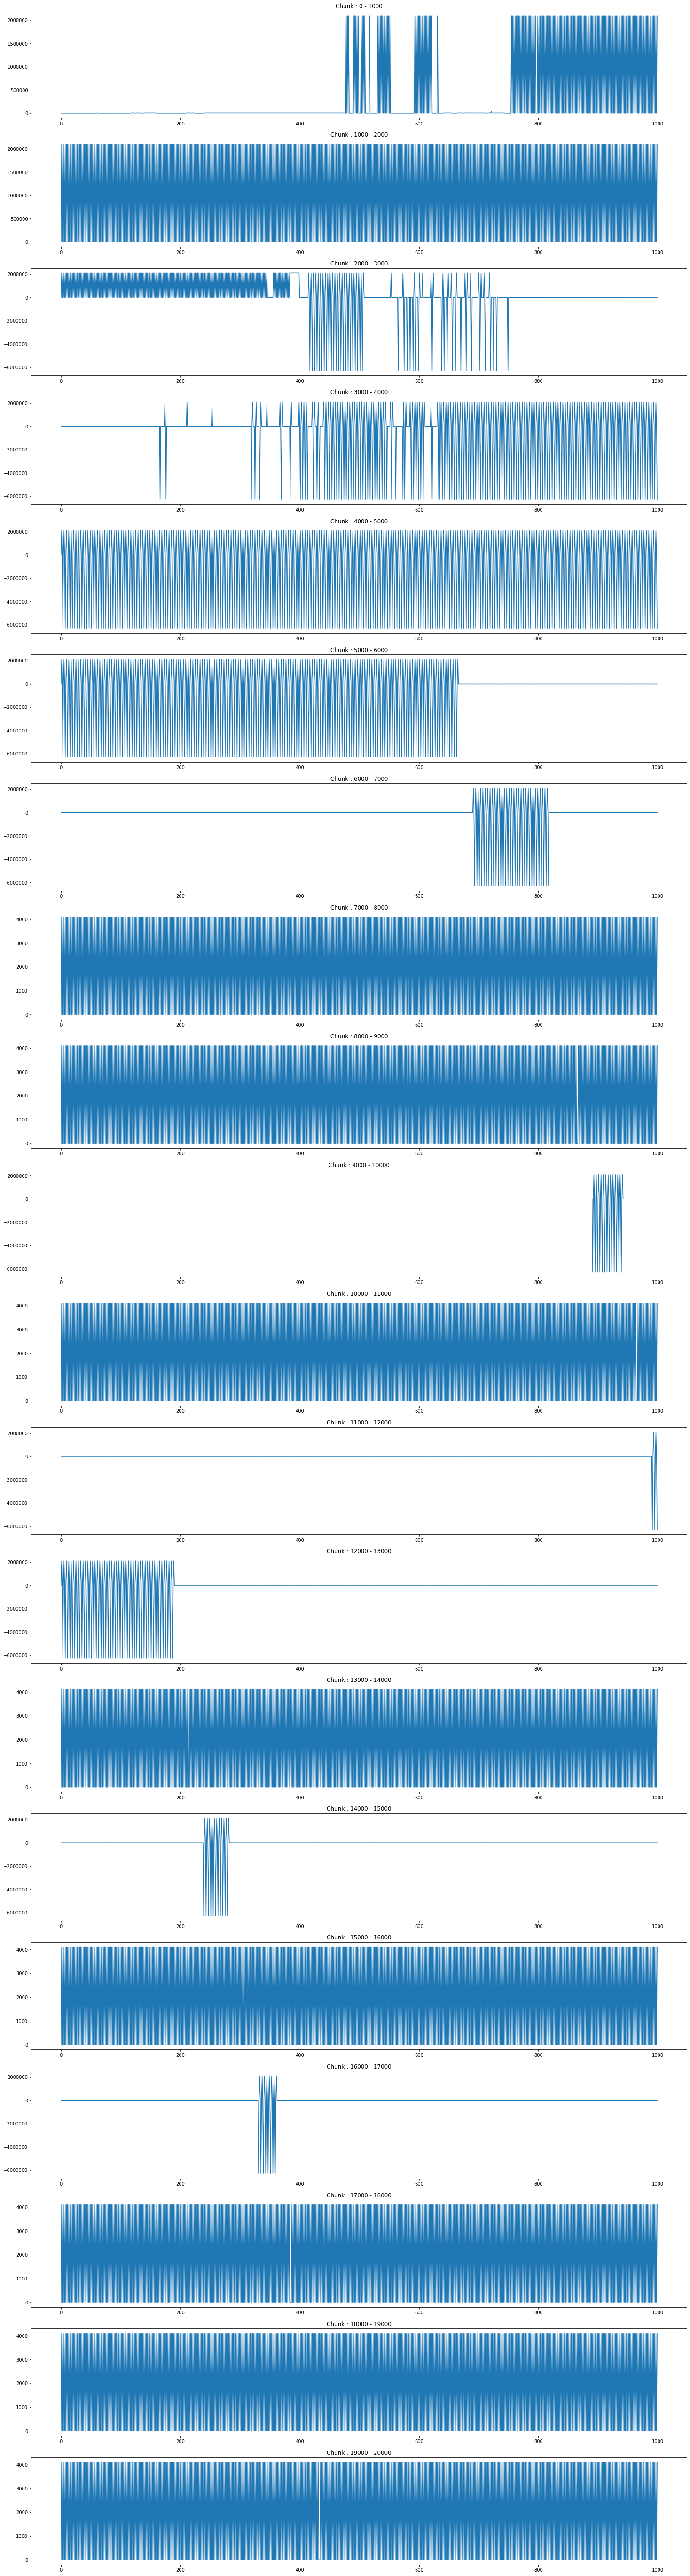

In [10]:
plt.figure(figsize=(25, 100))
num_chunk = 20
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

In [11]:
for i in range(20):
    print("{} - {} : ".format(i*1000, 1000 + i*1000), (tokenized_data[i*1000:1000+i*1000] == -1).sum())

0 - 1000 :  266
1000 - 2000 :  0
2000 - 3000 :  129
3000 - 4000 :  153
4000 - 5000 :  0
5000 - 6000 :  0
6000 - 7000 :  1
7000 - 8000 :  0
8000 - 9000 :  1
9000 - 10000 :  0
10000 - 11000 :  1
11000 - 12000 :  0
12000 - 13000 :  0
13000 - 14000 :  1
14000 - 15000 :  0
15000 - 16000 :  1
16000 - 17000 :  0
17000 - 18000 :  1
18000 - 19000 :  0
19000 - 20000 :  1


In [12]:
for i in range(20):
    print("{} - {} : ".format(i*1000, 1000 + i*1000), pd.Series(tokenized_data[i*1000:1000 + i*1000]).value_counts().index)

0 - 1000 :  Int64Index([4096, -1, 0, 2097152, 36864], dtype='int64')
1000 - 2000 :  Int64Index([2097152, 0], dtype='int64')
2000 - 3000 :  Int64Index([0, 2097152, 4096, -1, -6291456], dtype='int64')
3000 - 4000 :  Int64Index([0, -1, 4096, 2097152, -6291456, 12288], dtype='int64')
4000 - 5000 :  Int64Index([0, -6291456, 2097152], dtype='int64')
5000 - 6000 :  Int64Index([0, 4096, 2097152, -6291456], dtype='int64')
6000 - 7000 :  Int64Index([0, 4096, -6291456, 2097152, -1], dtype='int64')
7000 - 8000 :  Int64Index([4096, 0], dtype='int64')
8000 - 9000 :  Int64Index([0, 4096, -1], dtype='int64')
9000 - 10000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
10000 - 11000 :  Int64Index([0, 4096, -1], dtype='int64')
11000 - 12000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
12000 - 13000 :  Int64Index([0, 4096, 2097152, -6291456], dtype='int64')
13000 - 14000 :  Int64Index([0, 4096, -1], dtype='int64')
14000 - 15000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='i

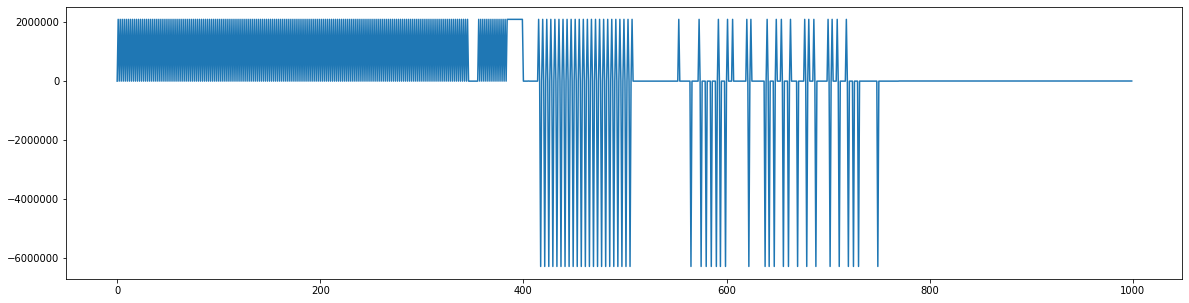

In [13]:
plt.plot(tokenized_data[2000:3000])

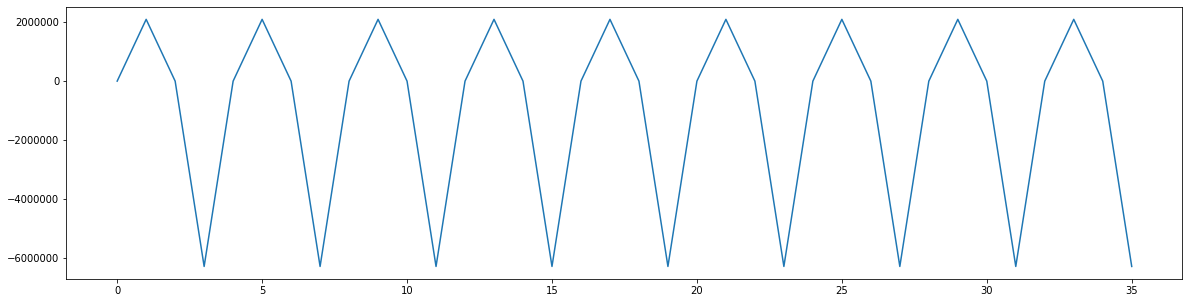

In [14]:
plt.plot(tokenized_data[2414:2450])

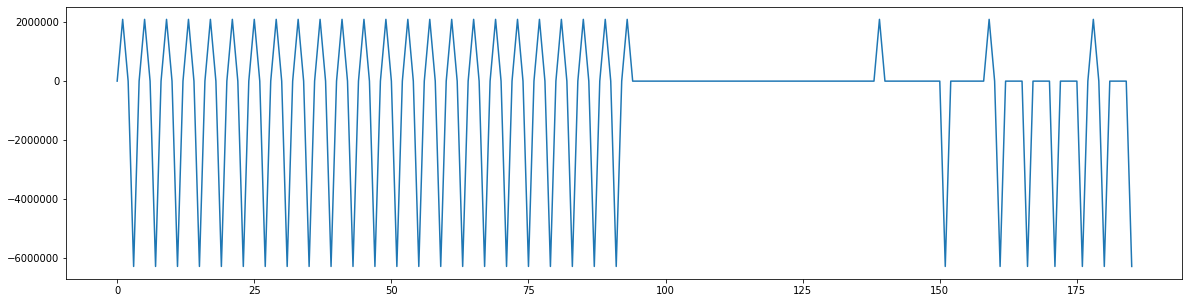

In [15]:
plt.plot(tokenized_data[2414:2600])

In [16]:
initial_stage_index = 2414

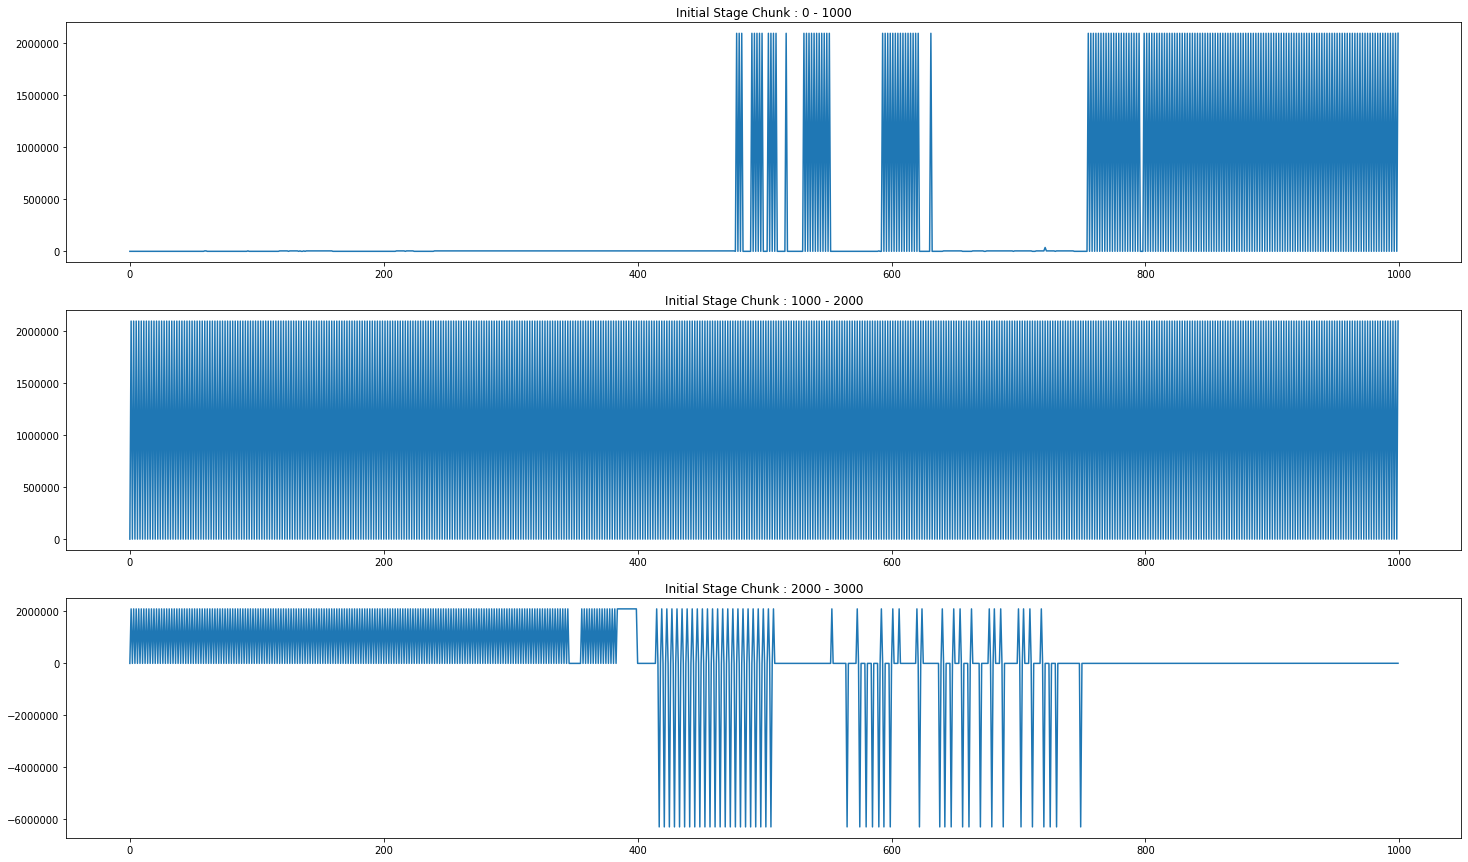

In [17]:
plt.figure(figsize=(25, 15))
num_chunk = initial_stage_index//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Initial Stage Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

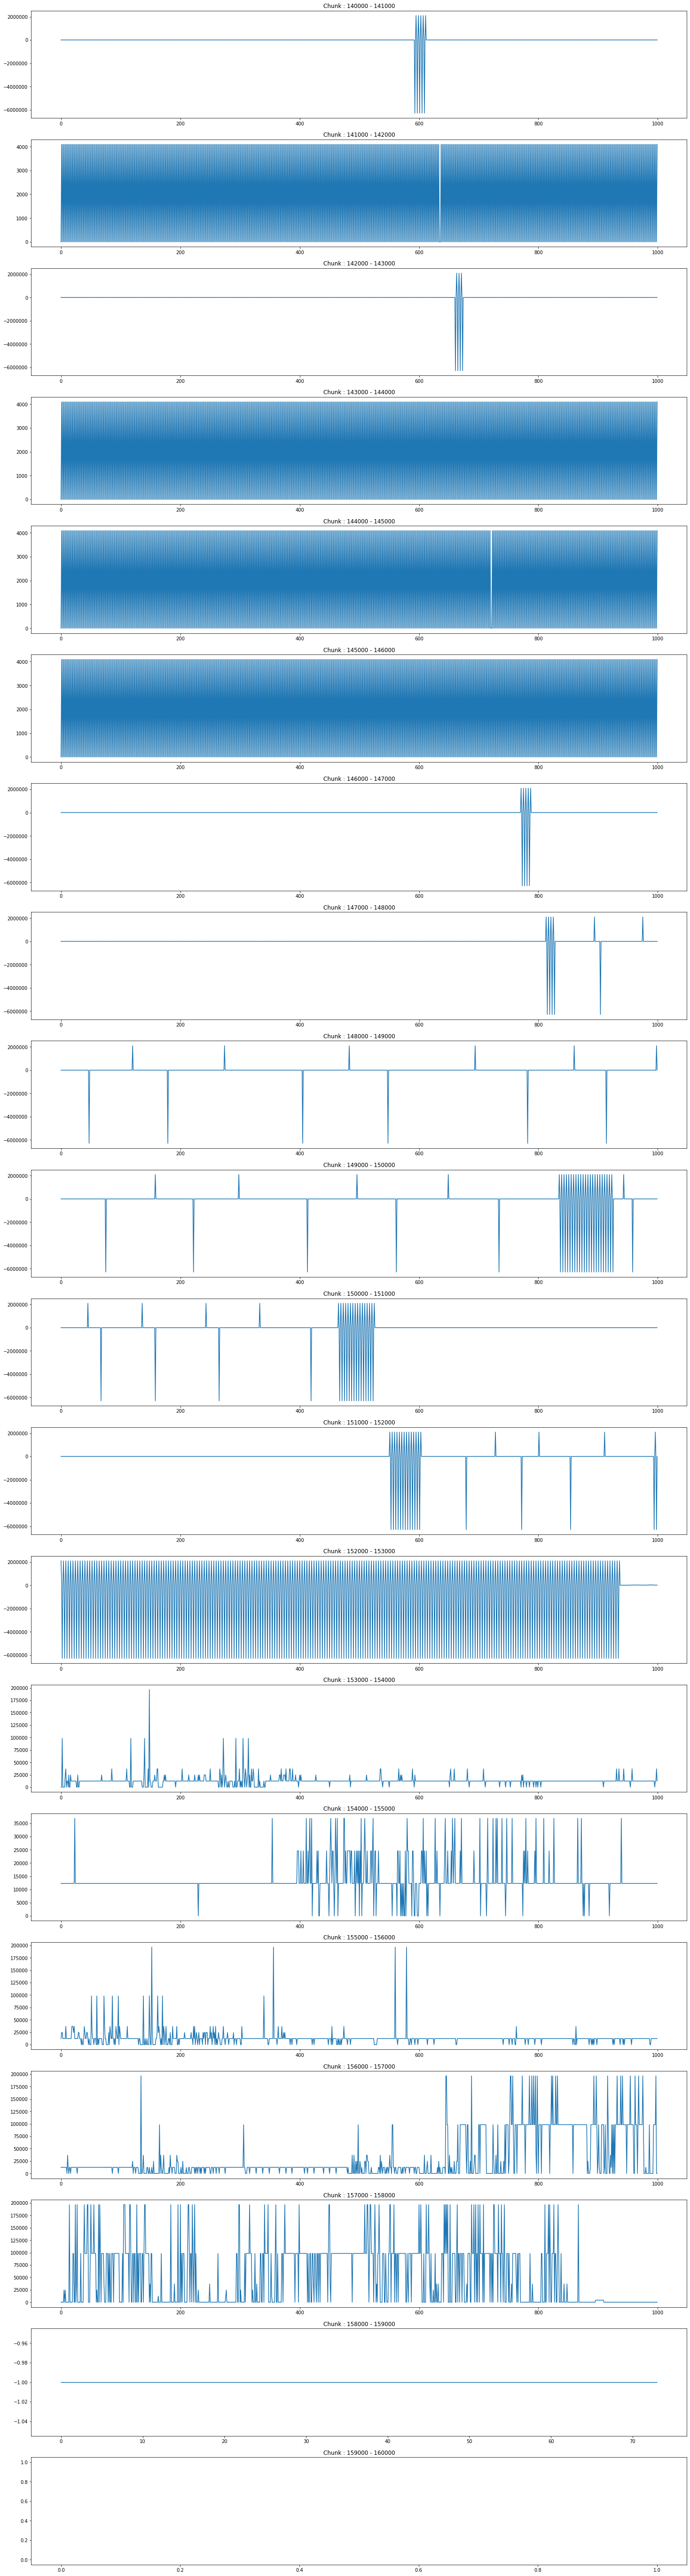

In [18]:
plt.figure(figsize=(25, 100))
num_chunk = 20
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(140000 + i*1000, 140000 + (i+1)*1000))
        plot = plt.plot(tokenized_data[140000 + i*1000:140000 + (i+1)*1000])

In [19]:
for i in range(20):
    print("{} - {} : ".format(140000 + i*1000, 140000 + 1000 + i*1000), (tokenized_data[140000 + i*1000:140000 + 1000+i*1000] == -1).sum())

140000 - 141000 :  0
141000 - 142000 :  1
142000 - 143000 :  0
143000 - 144000 :  0
144000 - 145000 :  1
145000 - 146000 :  0
146000 - 147000 :  1
147000 - 148000 :  1
148000 - 149000 :  0
149000 - 150000 :  0
150000 - 151000 :  0
151000 - 152000 :  1
152000 - 153000 :  21
153000 - 154000 :  102
154000 - 155000 :  37
155000 - 156000 :  136
156000 - 157000 :  286
157000 - 158000 :  509
158000 - 159000 :  74
159000 - 160000 :  0


In [20]:
for i in range(20):
    print("{} - {} : ".format(140000 + i*1000, 140000 + 1000 + i*1000), pd.Series(tokenized_data[140000 + i*1000:140000 + 1000 + i*1000]).value_counts().index)

140000 - 141000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
141000 - 142000 :  Int64Index([0, 4096, -1], dtype='int64')
142000 - 143000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
143000 - 144000 :  Int64Index([4096, 0], dtype='int64')
144000 - 145000 :  Int64Index([0, 4096, -1], dtype='int64')
145000 - 146000 :  Int64Index([4096, 0], dtype='int64')
146000 - 147000 :  Int64Index([0, 4096, 2097152, -6291456, -1], dtype='int64')
147000 - 148000 :  Int64Index([0, 4096, 2097152, -6291456, -1], dtype='int64')
148000 - 149000 :  Int64Index([0, -6291456, 2097152], dtype='int64')
149000 - 150000 :  Int64Index([0, -6291456, 2097152], dtype='int64')
150000 - 151000 :  Int64Index([0, 4096, 2097152, -6291456], dtype='int64')
151000 - 152000 :  Int64Index([0, 4096, -6291456, 2097152, -1], dtype='int64')
152000 - 153000 :  Int64Index([0, 2097152, -6291456, 12288, -1, 24576, 36864], dtype='int64')
153000 - 154000 :  Int64Index([12288, -1, 24576, 36864, 98304, 196608], dt

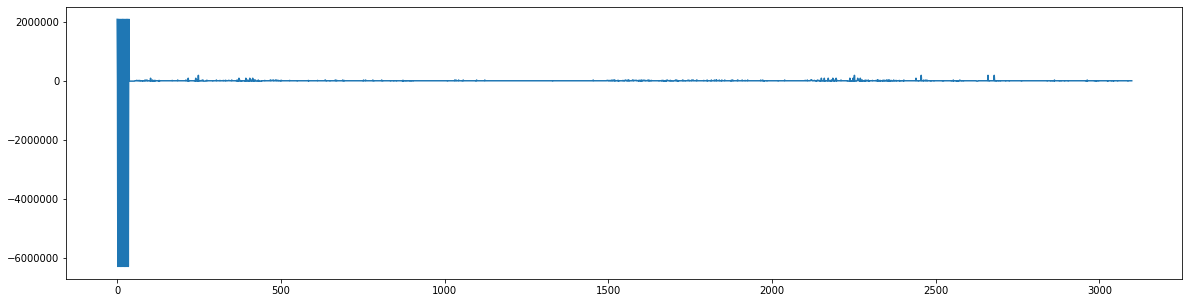

In [21]:
plt.plot(tokenized_data[152900:156000])

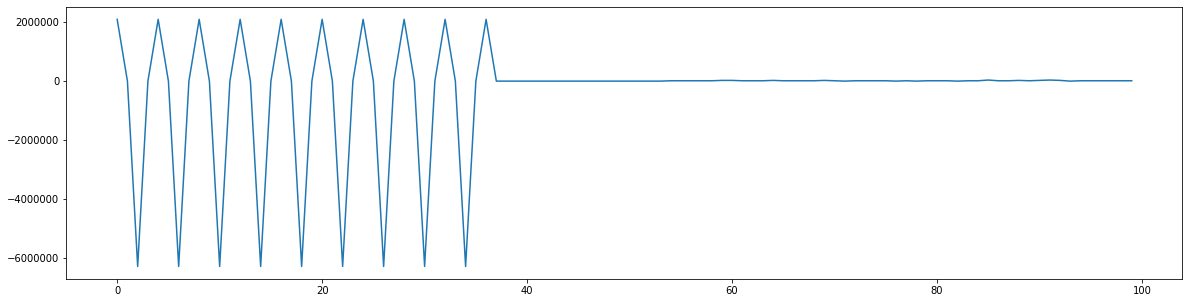

In [22]:
plt.plot(tokenized_data[152900:153000])

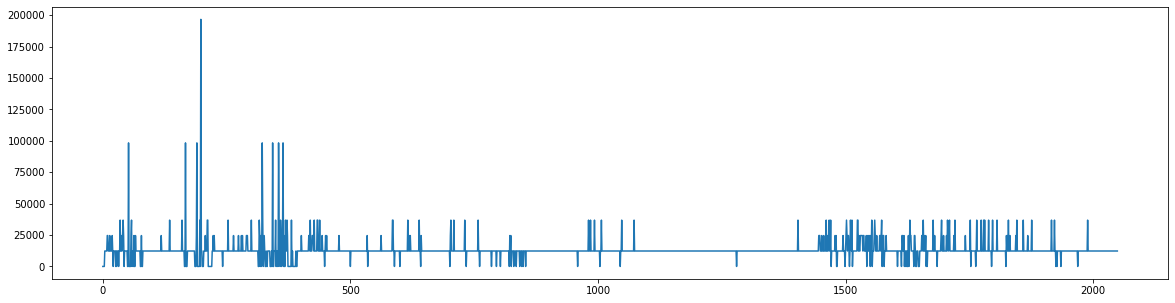

In [23]:
plt.plot(tokenized_data[152950:155000])

In [24]:
terminal_stage_index = 152950

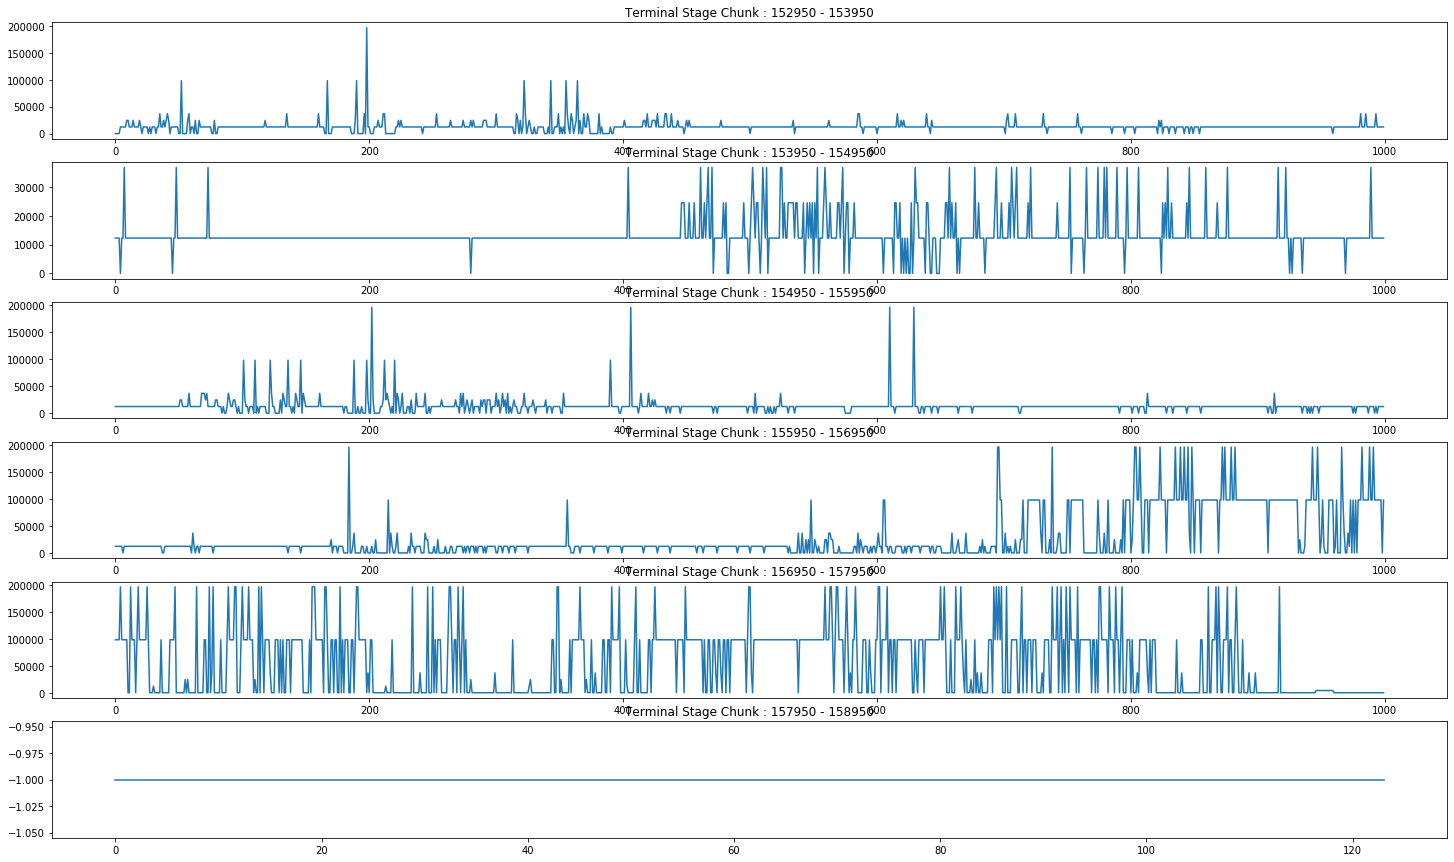

In [25]:
plt.figure(figsize=(25, 15))
num_chunk = (len(delta) - terminal_stage_index)//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Terminal Stage Chunk : {} - {}".format(terminal_stage_index + i*1000, terminal_stage_index + (i+1)*1000))
        plot = plt.plot(tokenized_data[terminal_stage_index + i*1000:terminal_stage_index + (i+1)*1000])

In [26]:
processed_dataset = pd.DataFrame(data=np.c_[data[initial_stage_index:terminal_stage_index], data[initial_stage_index+1:terminal_stage_index+1], delta[initial_stage_index:terminal_stage_index], tokenized_data[initial_stage_index:terminal_stage_index]], columns=["t", "t+1", "delta", "tokenized_data"])
processed_dataset

t           t+1    delta  tokenized_data
0       106749231104  106749231104        0               0
1       106749231104  106751328256  2097152         2097152
2       106751328256  106751328256        0               0
3       106751328256  106745036800 -6291456        -6291456
4       106745036800  106745036800        0               0
...              ...           ...      ...             ...
150531   47205102816   47205028163   -74653              -1
150532   47205028163   47205129904   101741              -1
150533   47205129904   47205099760   -30144              -1
150534   47205099760   47205108144     8384              -1
150535   47205108144   47205120880    12736              -1

[150536 rows x 4 columns]

In [27]:
for i in range(18000, 19000):
    print(processed_dataset["t+1"][i] - processed_dataset["t"][i], processed_dataset["delta"][i])

0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
2097152 2097152
0 0
-6291456 -6291456
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 409

In [28]:
processed_dataset["tokenized_data"].value_counts()

 0          76676
 4096       71122
 2097152     1167
-6291456     1164
-1            406
 12288          1
Name: tokenized_data, dtype: int64

In [29]:
abnomal_index = np.where(processed_dataset["tokenized_data"].to_numpy() == 12288)[0].tolist()[0]
processed_dataset["tokenized_data"].loc[abnomal_index] = -1

In [30]:
processed_dataset["tokenized_data"].value_counts()

 0          76676
 4096       71122
 2097152     1167
-6291456     1164
-1            407
Name: tokenized_data, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(processed_dataset, test_size=0.25, shuffle=False)
train_set, test_set

(                   t           t+1    delta  tokenized_data
 0       106749231104  106749231104        0               0
 1       106749231104  106751328256  2097152         2097152
 2       106751328256  106751328256        0               0
 3       106751328256  106745036800 -6291456        -6291456
 4       106745036800  106745036800        0               0
 ...              ...           ...      ...             ...
 112897  102762381312  102762385408     4096            4096
 112898  102762385408  102762385408        0               0
 112899  102762385408  102762389504     4096            4096
 112900  102762389504  102762389504        0               0
 112901  102762389504  102762393600     4096            4096
 
 [112902 rows x 4 columns],
                    t           t+1   delta  tokenized_data
 112902  102762393600  102762393600       0               0
 112903  102762393600  102762397696    4096            4096
 112904  102762397696  102762397696       0               

In [32]:
train_set.to_csv("data/StreamBench_2G1P_train_set.csv", index=False)
test_set.to_csv("data/StreamBench_2G1P_test_set.csv", index=False)